<h1 style="color: orange; text-align: center; font-size: 2em; font-weight: bold;">Dengue Cases Data Analysis in the Philippines</h1>
<hr>
<h3 style="color: orange; text-align: center;">Analyst: Din Lienard L. Dudas</h3>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import warnings
from scipy.stats import f_oneway
warnings.filterwarnings('ignore')

In [2]:
dengue = pd.read_csv('datasets\\dengue.csv')
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [3]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [4]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [5]:
dengue['Year'] = dengue['Year'].astype('int')

In [6]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

<hr>
<h1 style="text-align: center;">ANALYSIS OF DENGUE CASES PER REGION </h1>

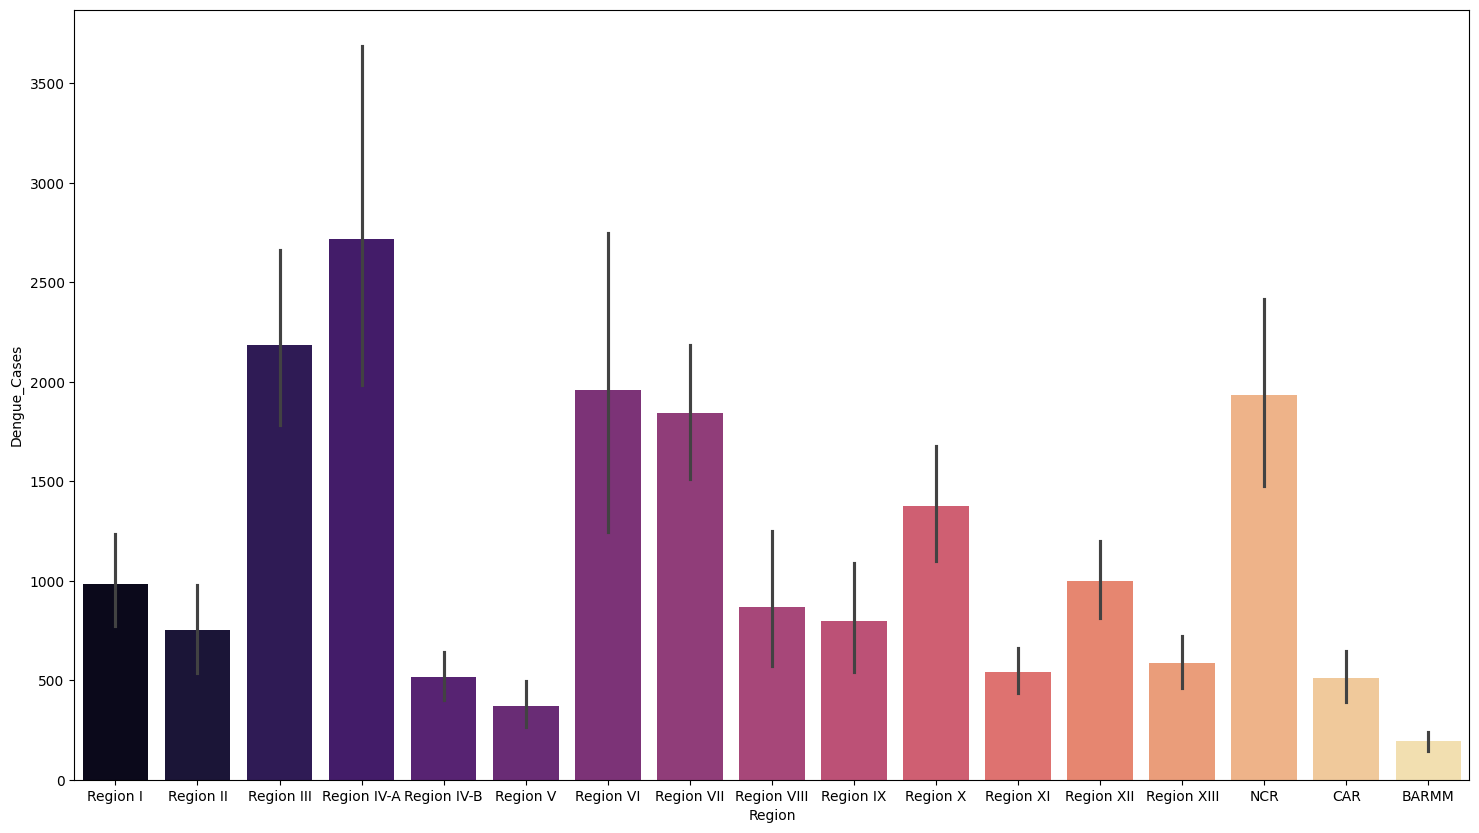

In [7]:
visual1 = sns.barplot(data=dengue, x='Region', y="Dengue_Cases", palette='magma')
plt.gcf().set_size_inches(18,10)
plt.show()

<h2 style="text-align: center;"> 🔍Insight #1</h2>
<p style="text-align: center; font-size: 1.3em;">■ The graph shows the numbers of reported dengue cases in all regions of the Philippines, The highest case was the most <strong>densely populated regions</strong> in the country specially the <strong>REGION III, REGION IV-A, Region VI, Region VII and NCR.</strong></p>
<hr>

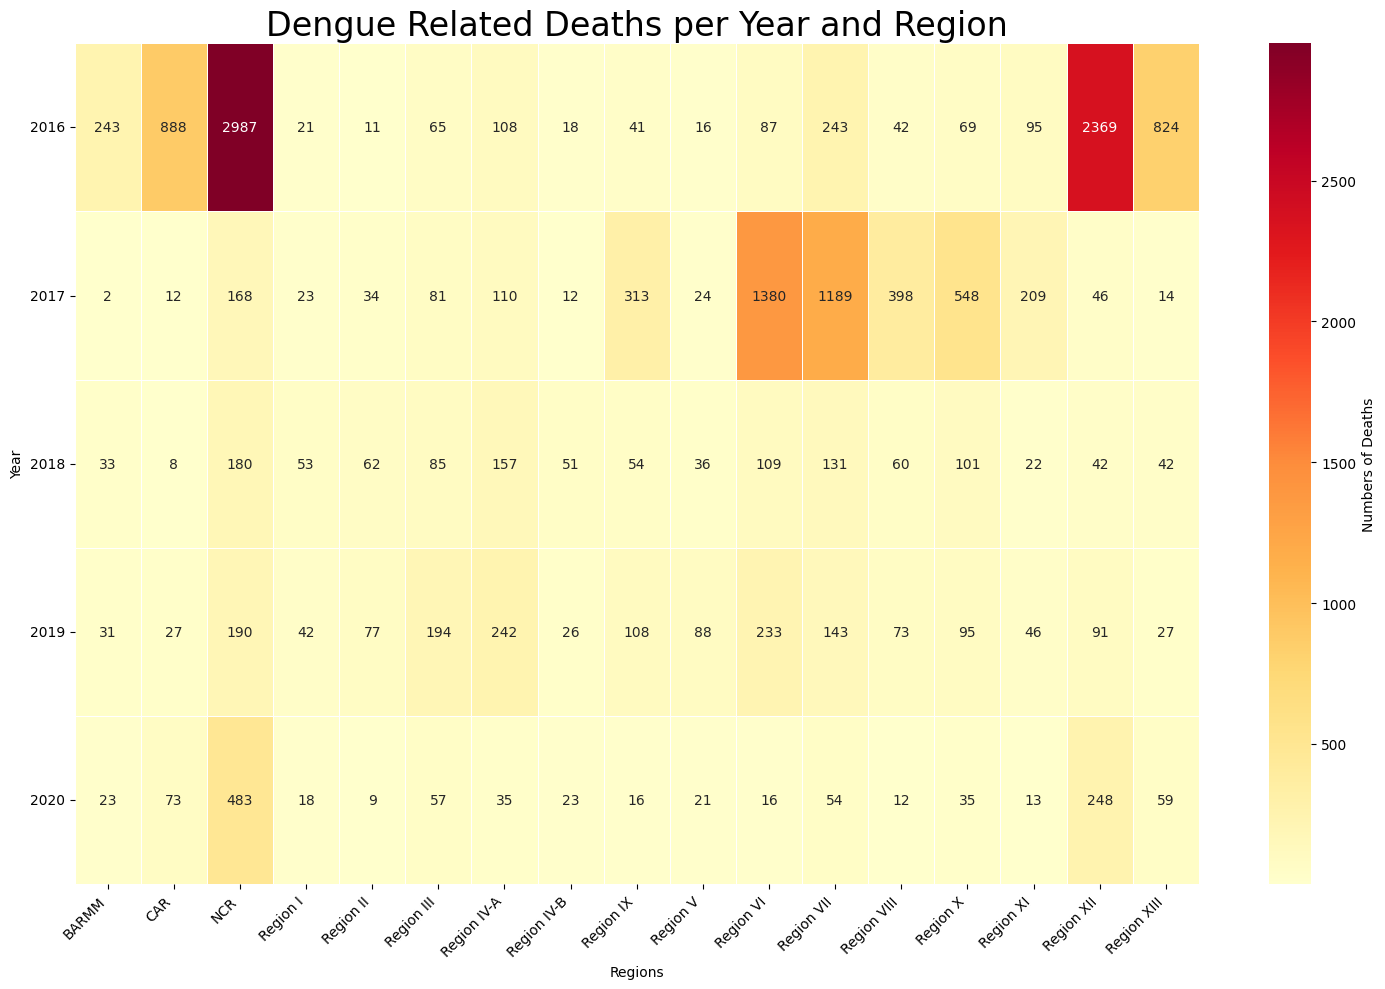

In [8]:
heatmap_data = dengue.groupby(['Year', 'Region'])['Dengue_Deaths'].sum().unstack()
plt.figure(figsize=(15, 10))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlOrRd", linewidths=.5, cbar_kws={'label': 'Numbers of Deaths'})
plt.title('Dengue Related Deaths per Year and Region', fontsize=24)
plt.xlabel('Regions', fontsize=10)
plt.ylabel('Year', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

<h2 style="text-align: center;"> 🔍Insight #2</h2>
<p style="text-align: center; font-size: 1.3em;">■ In the heatmap, 2016 stands out as the darkest year, Numerous regions display deep orange and red intensities, indicating a significantly elevated number of reported dengue related deaths. <strong>The National Capital Region (NCR) recorded the highest number of deaths in 2016, with 2,987 cases</strong>, followed by <strong>Region XII with 2,369 deaths</strong>, positioning both as pronounced “red” hotspots on the yellow-to-red severity scale. Regions such as the <strong>Cordillera Administrative Region (CAR)</strong> and <strong>Region XIII</strong> register orange-level intensities, each reporting more than <strong>800 deaths</strong> within the same year.</p>
<h2 style="text-align: center;"> 🔍Insight #3</h2>
<p style="text-align: center; font-size: 1.3em;">■ Dengue-related deaths increased across the <strong>Visayas regions in 2017</strong>, with <strong>Region VI reporting 1,380 deaths</strong> and <strong>Region VII recording 1,189 deaths</strong>. These figures place both regions within the orange-level intensity, Indicating a clearly higher number of deaths for that year.</p>
<h2 style="text-align: center;"> 🔍Insight #4</h2>
<p style="text-align: center; font-size: 1.3em;">■ Dengue related deaths hotspots are <strong>not randomly distributed</strong>, they are concentrated primarily in <strong>Urban areas</strong>, which consistently record the highest numbers of dengue-related deaths. In contrast, most <strong>Rural regions</strong> remain within the yellow-level intensity range, reflecting comparatively lower mortality.</p>

<hr>

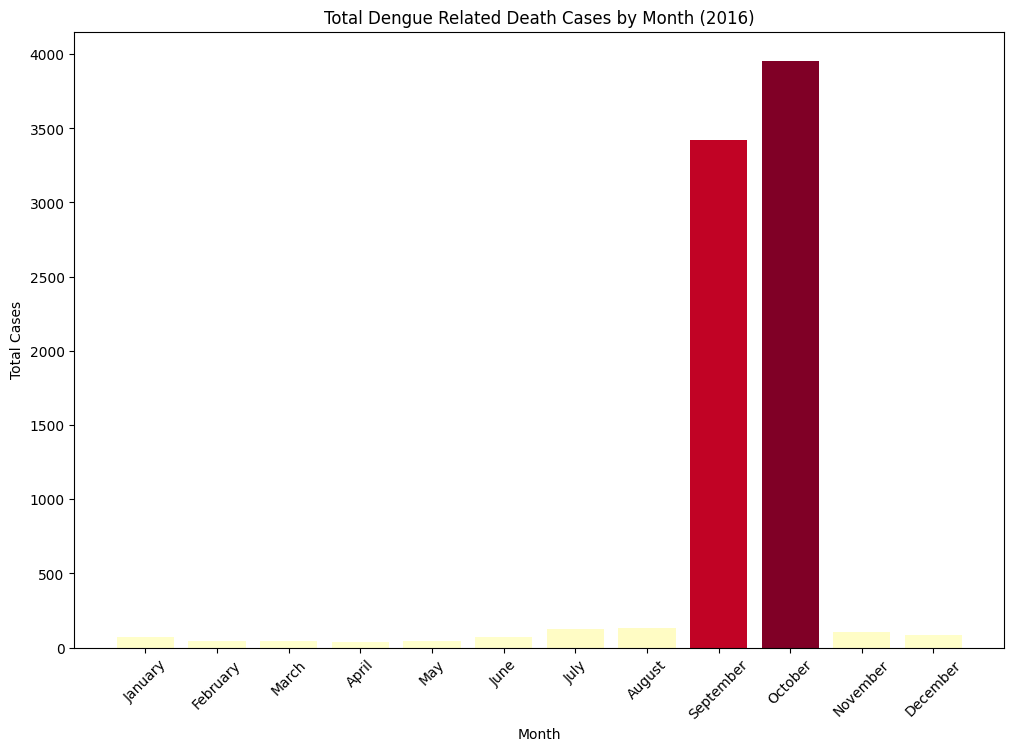

In [9]:
month_order = ['January','February','March','April','May','June','July',
               'August','September','October','November','December']

m_2016 = dengue[dengue["Year"] == 2016]
m_dcase = (m_2016.groupby("Month")["Dengue_Deaths"]
                  .sum()
                  .reindex(month_order))

values = m_dcase.values
norm = plt.Normalize(values.min(), values.max())
colors = cm.YlOrRd(norm(values))

plt.bar(m_dcase.index, values, color=colors)
plt.title("Total Dengue Related Death Cases by Month (2016)")
plt.xlabel("Month")
plt.ylabel("Total Cases")
plt.gcf().set_size_inches(12,8)
plt.xticks(rotation=45)
plt.show()

<h2 style="text-align: center;"> 🔍Insight #5</h2>
<p style="text-align: center; font-size: 1.3em;">■ The graph shows the number of dengue related deaths in 2016 was highest in <strong>September</strong> and <strong>October</strong>, showing a clear peak during these months. These two months recorded noticeably more deaths than the rest, indicating a clear peak in dengue severity toward the end of the <strong>rainy season</strong>.</p>
<h2 style="text-align: center;"> 🔍Insight #6</h2>
<p style="text-align: center; font-size: 1.3em;">■ The graph highlights September and October as <strong>the most critical months for dengue mortality</strong> in 2016, emphasizing the need for heightened prevention efforts, public awareness, and healthcare preparedness as the year transitions from the rainy to post rainy season.</p>
<hr>

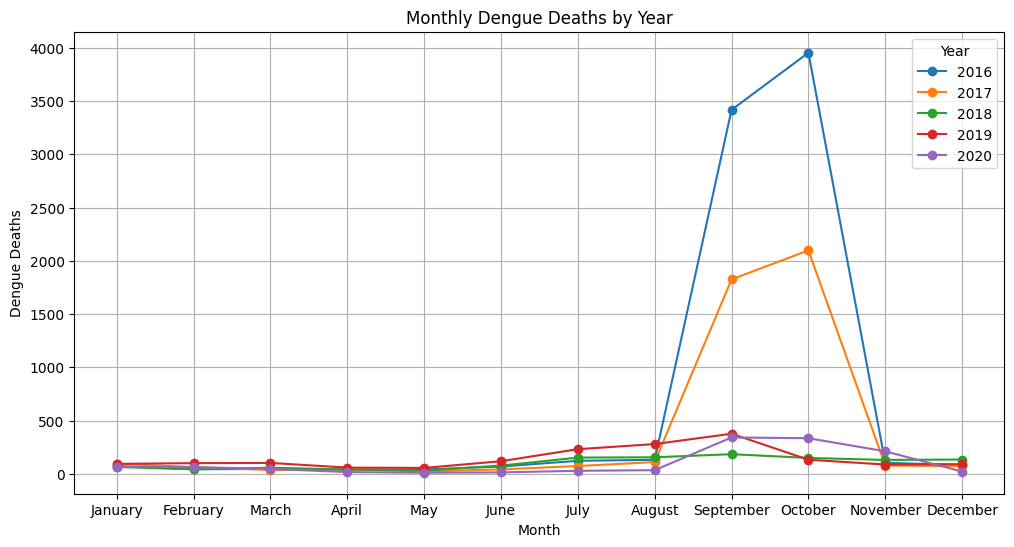

In [10]:
# Compute monthly deaths grouped by Month and Year
monthly_deaths = dengue.groupby(["Month", "Year"])["Dengue_Deaths"].sum()

# Pivot so Months = rows, Years = columns
df_deaths = monthly_deaths.unstack()

# Reindex by desired month order
df_deaths = df_deaths.reindex(month_order)

# Plot
df_deaths.plot(kind='line', marker='o', figsize=(12, 6))
plt.grid(True)
plt.xticks(range(len(month_order)), month_order)
plt.xlabel("Month")
plt.ylabel("Dengue Deaths")
plt.title("Monthly Dengue Deaths by Year")
plt.show()


<h2 style="text-align: center;"> 🔍Insight #7</h2>
<p style="text-align: center; font-size: 1.3em;">■ The graph shows clear and consistent pattern becomes visible across the five-year period. This pattern suggests that September and October months consistently represent the peak of dengue severity each year. Although the total number of deaths changes from year to year, the monthly distribution shows a stable trend, September and October repeatedly emerge as the months with the highest dengue-related deaths.</p>
<h2 style="text-align: center;"> 🔍Insight #8</h2>
<p style="text-align: center; font-size: 1.3em;">■ During the first part of the year, from January through May, the plot remain low and relatively stable, indicating that dengue mortality is minimal during these months. As the year progresses into June and July, there is a noticeable gradual increase, showing the early stages of rising dengue activity.</p>
<h2 style="text-align: center;"> 🔍Insight #9</h2>
<p style="text-align: center; font-size: 1.3em;">■ The graph shows a noticeable and sudden decrease in dengue related deaths during November and December. After reaching a strong peak in September and October, the number of deaths drops sharply as the year approaches its end.</p>
<h2 style="text-align: center;"> 🔍Insight #10</h2>
<p style="text-align: center; font-size: 1.3em;">■ The graph clearly captures the shift, illustrating how quickly dengue activity can fall once environmental conditions become less favorable for mosquito survival and disease spread.</p>

<hr>